In [ ]:
%mkdir notebooks
%cd notebooks
!git clone https://github.com/SlightlyCodic/NLP-Coursework-Notebooks.git
%cd NLP-Coursework-Notebooks

/content/notebooks
Cloning into 'NLP-Coursework-Notebooks'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 94 (delta 54), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 378.92 KiB | 5.74 MiB/s, done.
Resolving deltas: 100% (54/54), done.
/content/notebooks/NLP-Coursework-Notebooks


In [ ]:
import wandb
wandb.login(key="7a2997c611d00d9b324bd00c24ab0456c1c109ff")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: chiragj831 (chiragj831-university-of-surrey) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
pip install huggingface_hub transformers seqeval evaluate schedulefree wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━

In [ ]:
!pip install -q datasets==3.6.0 fsspec==2025.3.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:
import pandas as pd
import tabulate
import spacy
from datasets import load_dataset
from huggingface_hub import notebook_login
from collections import Counter
import matplotlib.pyplot as plt
from collections import defaultdict
from transformers import AutoTokenizer, RobertaTokenizerFast
from transformers import AutoModelForTokenClassification, RobertaForTokenClassification, TrainingArguments, Trainer
from transformers import DataCollatorForTokenClassification
import evaluate
import numpy as np
from datasets import concatenate_datasets
from datasets import Dataset, DatasetDict
import gc
import torch
import random
from transformers import set_seed
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
metric = evaluate.load("seqeval")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


#Analyze and Visualize the Dataset

In [ ]:
ds = load_dataset("surrey-nlp/PLOD-CW-25")

README.md:   0%|          | 0.00/268 [00:00<?, ?B/s]

PLOD-CW-25-Train.parquet:   0%|          | 0.00/343k [00:00<?, ?B/s]

PLOD-CW-25-Test.parquet:   0%|          | 0.00/55.5k [00:00<?, ?B/s]

PLOD-CW-25-Val.parquet:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/250 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/150 [00:00<?, ? examples/s]

In [ ]:
# Looking into the train dataset
train_data = ds["train"]
val_data = ds["validation"]
test_data = ds["test"]
train_dataframe = pd.DataFrame(train_data)
val_dataframe = pd.DataFrame(val_data)
test_dataframe = pd.DataFrame(test_data)
train_dataframe.head()

,tokens,pos_tags,ner_tags
0,"[MRR, ,, mortality, rate, ratio, ;, TBI, ,, tr...","[NOUN, PUNCT, NOUN, NOUN, NOUN, PUNCT, PROPN, ...","[B-AC, O, B-LF, I-LF, I-LF, O, B-AC, O, B-LF, ..."
1,"[HPC, ,, hippocampus, ;, mOFC, ,, medial, OFC,...","[PROPN, PUNCT, NOUN, PUNCT, NOUN, PUNCT, ADJ, ...","[B-AC, O, B-LF, O, O, O, O, B-AC, O, B-AC, O, ..."
2,"[In, addition, to, the, effects, on, cell, gro...","[ADP, NOUN, ADP, DET, NOUN, ADP, NOUN, NOUN, C...","[O, O, O, O, O, O, O, O, O, O, O, O, B-AC, B-A..."
3,"[Abbreviations, :, HC, ,, C, -, terminal, rece...","[NOUN, PUNCT, PROPN, PUNCT, NOUN, PUNCT, ADJ, ...","[O, O, B-AC, O, B-LF, I-LF, I-LF, I-LF, I-LF, ..."
4,"[LL, :, lower, limit, ,, UL, :, upper, limit, .]","[PROPN, PUNCT, ADJ, NOUN, PUNCT, PROPN, PUNCT,...","[B-AC, O, B-LF, I-LF, O, B-AC, O, B-LF, I-LF, O]"


ABBREVIATIONS are labeled  with AC and LONG FORMS are labeled with LF.
Since multiple tokens can belong to the same long form, the BIO format is used for labeling.
Tokens labeled with “O” indicate tokens that are neither abbreviations nor long forms.
B-AC  signifies  that  a  token  is  an  abbreviation/acronym,  while  B-LF  signifies  that  a  long  form begins with this token.
I-LF indicates that a token is inside a long-form phrase.
Labels: O, B-AC, B-LF, I-LF

In [ ]:
# flatten the data and visualize
tokens = train_dataframe['tokens']
labels = train_dataframe['ner_tags']
tags = train_dataframe['pos_tags']
table = []
for i in range(len(tokens)):
  if i == 0:
    table.append([tokens.iloc[i], labels.iloc[i], tags.iloc[i]])
print(tabulate.tabulate(table, headers = ['Tokens', 'Labels', 'Tags'], tablefmt = "grid"))

+--------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------+
| Tokens                                                                                           | Labels                                                                               | Tags                                                                                                 |
+==================================================================================================+======================================================================================+======================================================================================================+
| ['MRR', ',', 'mortality', 'rate', 'ratio', ';', 'TBI', ',', 'traumatic', 'brain', 'injury', '.'] | ['B-AC', 'O', 'B-LF', 'I-L

Distribution of the tags in the train data

In [ ]:
bio_tags = [tag for data in train_data for tag in data['ner_tags']]
tag_counts = Counter(bio_tags)
print(tag_counts)

Counter({'O': 62474, 'I-LF': 9525, 'B-AC': 6626, 'B-LF': 3923})


Top 10 most frequent abbreviations

In [ ]:
abbreviations = [data['tokens'][i] for data in train_data for i, tag in enumerate(data['ner_tags']) if tag == 'B-AC']
abbreviation_counts = Counter(abbreviations)
print(abbreviation_counts.most_common(10))

[('-', 330), ('CI', 61), ('WT', 47), ('HR', 40), ('OR', 40), ('/', 39), ('BMI', 39), ('GFP', 39), ('TB', 31), ('SD', 28)]


Distribution of the POS tags

In [ ]:
pos_tags = [pos for data in train_data for pos in data['pos_tags']]
pos_counts = Counter(pos_tags)
print(pos_counts)

Counter({'NOUN': 22063, 'PUNCT': 19295, 'PROPN': 9141, 'ADJ': 6842, 'ADP': 6431, 'VERB': 4894, 'DET': 3481, 'NUM': 2841, 'CCONJ': 2069, 'AUX': 1596, 'ADV': 1093, 'PRON': 793, 'PART': 599, 'X': 495, 'SYM': 481, 'SCONJ': 420, 'INTJ': 14})


Checking for repeated Abbrievations

In [ ]:
abbreviation_counts = defaultdict(int)
for data in train_data:
  for token, label in zip(data['tokens'], data['ner_tags']):
    if label == "B-AC":
      abbreviation_counts[token] +=1

sorted_abbreivation_counts = sorted(abbreviation_counts.items(), key=lambda x: x[1], reverse=True)

for token, count in sorted_abbreivation_counts[:10]:
  print(f"{token}: {count}")

-: 330
CI: 61
WT: 47
HR: 40
OR: 40
/: 39
BMI: 39
GFP: 39
TB: 31
SD: 28


Converting NER tags from string to Integer

In [ ]:
label_list = ['O', 'B-AC', 'B-LF', 'I-LF']
label_to_id = {label: i for i, label in enumerate(label_list)}

for split in ["train", "validation", "test"]:
    ds[split] = ds[split].map(lambda x: {"ner_tags": [label_to_id[tag] for tag in x["ner_tags"]]})

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

# Experiment 1

Different Modelling Techniques

BERT vs RoBERTa

Below is the experiment with Bert

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.280500,0.333527,0.741880,0.834081,0.785283,0.883522
2,0.237800,0.327365,0.749015,0.852659,0.797484,0.887744
3,0.229100,0.313513,0.762500,0.859705,0.808190,0.890724


Below is the results on the test data
{'AC': {'precision': np.float64(0.8345778288340034), 'recall': np.float64(0.9161412358133669), 'f1': np.float64(0.8734595731890593), 'number': np.int64(1586)}, 'LF': {'precision': np.float64(0.6984732824427481), 'recall': np.float64(0.8124306326304107), 'f1': np.float64(0.7511544381734223), 'number': np.int64(901)}, 'overall_precision': np.float64(0.7834349229114378), 'overall_recall': np.float64(0.8785685564937676), 'overall_f1': np.float64(0.8282789992418499), 'overall_accuracy': 0.9150499706055262}


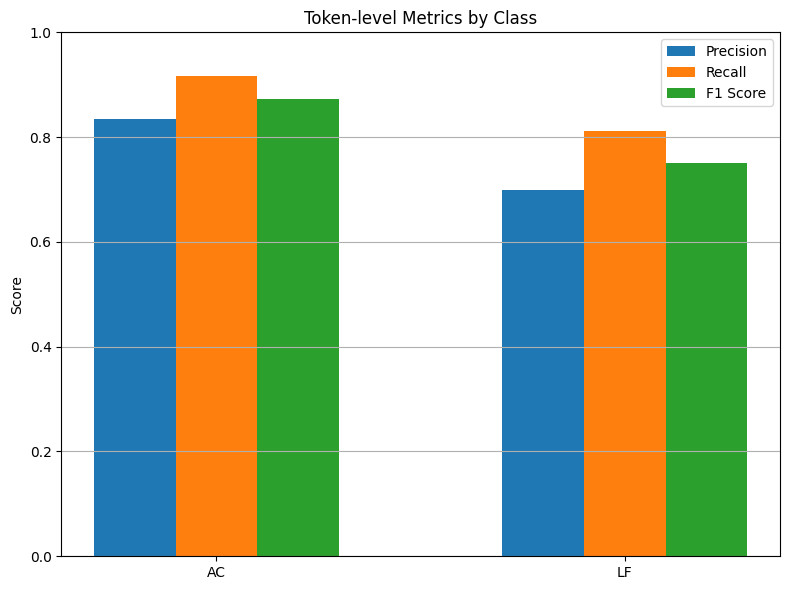

Below is the Confusion Matrix of the results


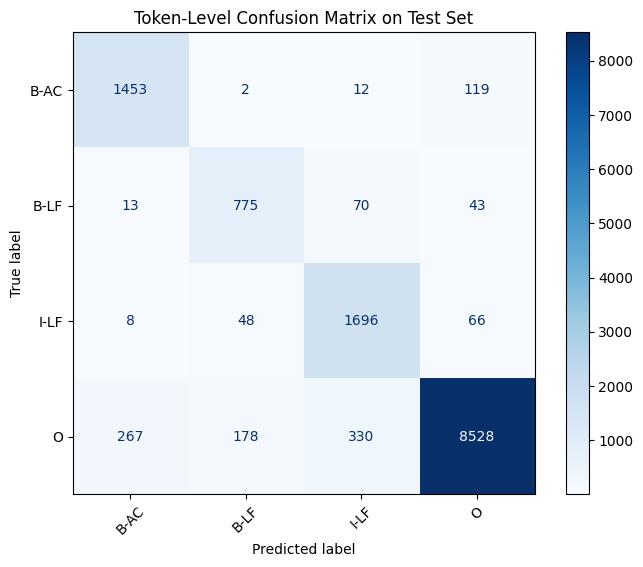

In [ ]:
%run Experiment1_Bert.ipynb

Below is the experiment with RoBERTa

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.246100,0.297742,0.782074,0.849777,0.814521,0.893482
2,0.219800,0.294229,0.792967,0.889879,0.838632,0.901217
3,0.208700,0.285359,0.798295,0.894335,0.843591,0.903627


Below is the results on the test data
{'AC': {'precision': np.float64(0.8625678119349005), 'recall': np.float64(0.9178960872354073), 'f1': np.float64(0.889372280919826), 'number': np.int64(1559)}, 'LF': {'precision': np.float64(0.773109243697479), 'recall': np.float64(0.8618266978922716), 'f1': np.float64(0.8150609080841639), 'number': np.int64(854)}, 'overall_precision': np.float64(0.8299502106472616), 'overall_recall': np.float64(0.8980522171570658), 'overall_f1': np.float64(0.8626592356687898), 'overall_accuracy': 0.9245807955485374}


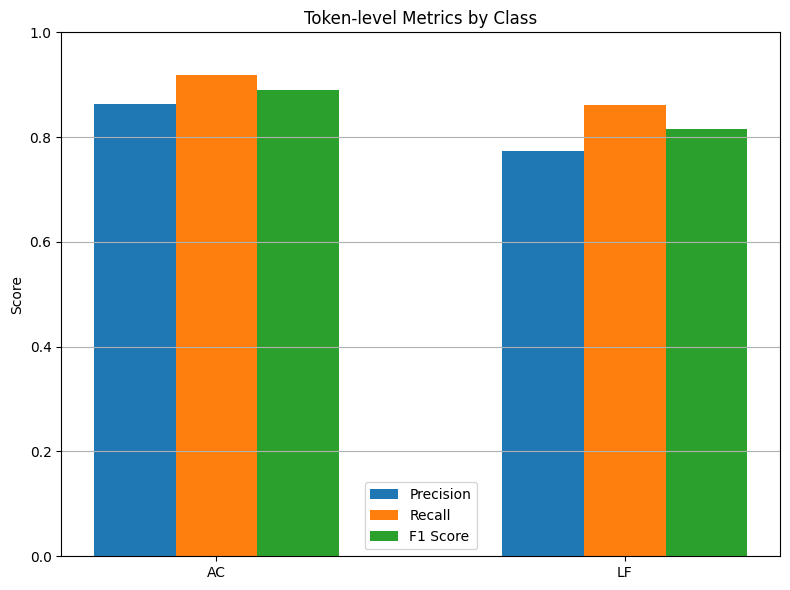

Below is the Confusion Matrix of the results


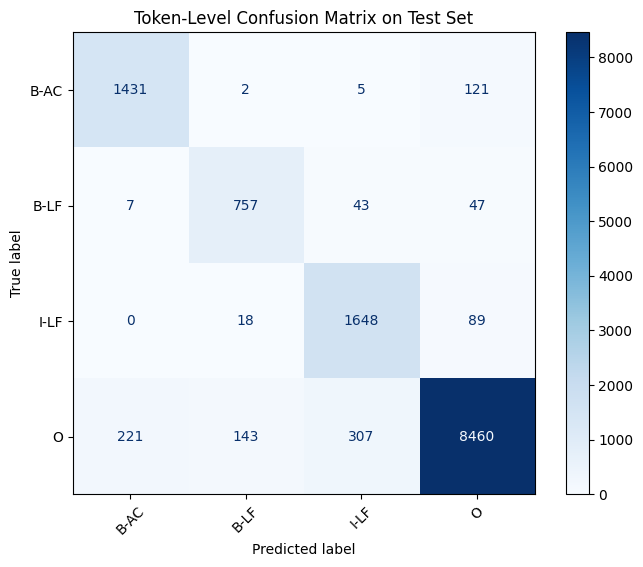

In [ ]:
%run Experiment1_RoBERTa.ipynb

In [ ]:
!rm -rf roberta-base

# Experiment 2

Different Optimizers

schedulefree adamw vs adafactor

Below is experiment with RoBERTa base and schedulefree optimizer:

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.265600,0.313225,0.754327,0.859962,0.803688,0.888029
2,0.217500,0.290315,0.791737,0.890516,0.838226,0.898174
3,0.216700,0.290622,0.797251,0.886060,0.839313,0.899696


Below is the results on the test data
{'AC': {'precision': np.float64(0.8658980582524272), 'recall': np.float64(0.9153303399615138), 'f1': np.float64(0.8899282818833801), 'number': np.int64(1559)}, 'LF': {'precision': np.float64(0.7548518896833504), 'recall': np.float64(0.8653395784543325), 'f1': np.float64(0.8063284233496999), 'number': np.int64(854)}, 'overall_precision': np.float64(0.824514655500571), 'overall_recall': np.float64(0.8976377952755905), 'overall_f1': np.float64(0.8595238095238095), 'overall_accuracy': 0.9241296338070532}


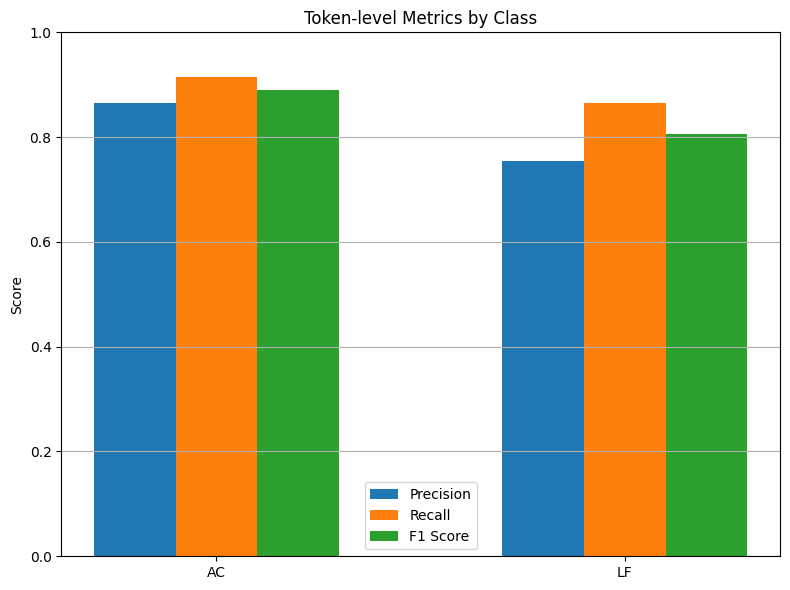

Below is the Confusion Matrix of the results


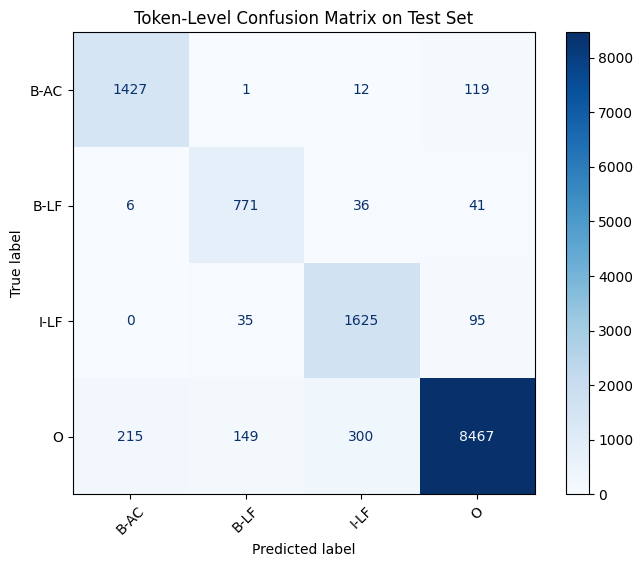

In [ ]:
%run Experiment2_schedulefree.ipynb

Below is experiment with RoBERTa base and adafactor optimizer:

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.257100,0.288972,0.791890,0.845321,0.817734,0.895765
2,0.227400,0.330889,0.772904,0.886060,0.825623,0.892341
3,0.223800,0.281861,0.774656,0.894971,0.830478,0.895891


Below is the results on the test data
{'AC': {'precision': np.float64(0.844626168224299), 'recall': np.float64(0.927517639512508), 'f1': np.float64(0.8841332925710791), 'number': np.int64(1559)}, 'LF': {'precision': np.float64(0.7271863117870723), 'recall': np.float64(0.8957845433255269), 'f1': np.float64(0.8027282266526758), 'number': np.int64(854)}, 'overall_precision': np.float64(0.7999276410998553), 'overall_recall': np.float64(0.9162867799419809), 'overall_f1': np.float64(0.8541626424570214), 'overall_accuracy': 0.9211218888638244}


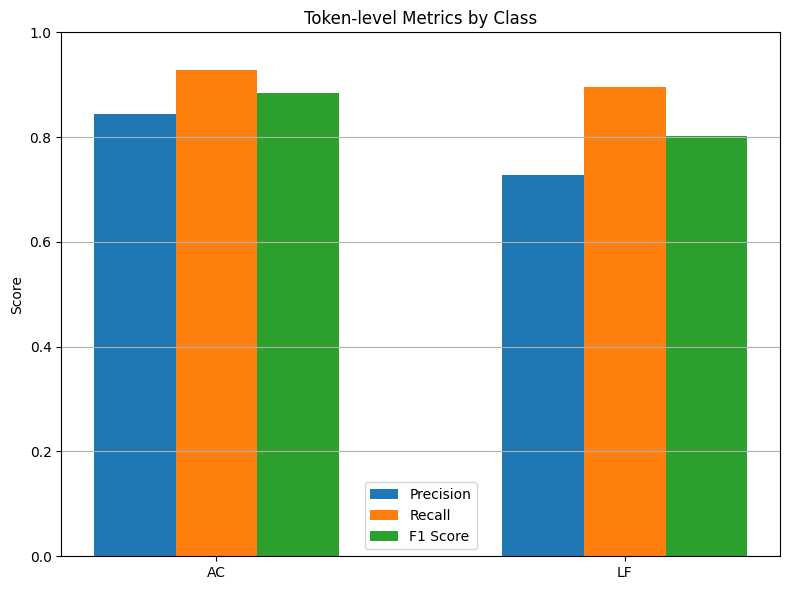

Below is the Confusion Matrix of the results


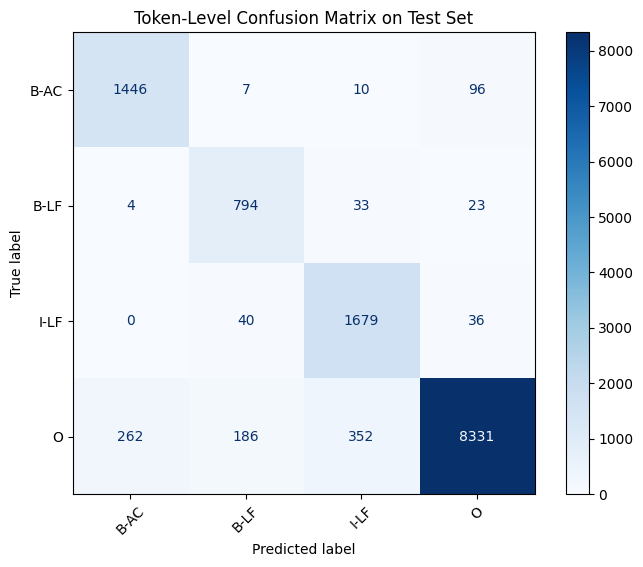

In [ ]:
%run Experiment2_adafactor.ipynb

In [ ]:
!rm -rf roberta-base

# Experiment 3

Using Additional Dataset

25% of Additional Data vs 50% of Additional Data in Training

Below is experiment with RoBERTa base with adafactor optimizer and with 25% of additional data:

README.md:   0%|          | 0.00/268 [00:00<?, ?B/s]

PLOD-CW-25-Train.parquet:   0%|          | 0.00/343k [00:00<?, ?B/s]

PLOD-CW-25-Test.parquet:   0%|          | 0.00/55.5k [00:00<?, ?B/s]

PLOD-CW-25-Val.parquet:   0%|          | 0.00/35.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/250 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/150 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/295 [00:00<?, ?B/s]

PLOD_v2_filtered_train.parquet:   0%|          | 0.00/25.0M [00:00<?, ?B/s]

PLOD_v2_filtered_val.parquet:   0%|          | 0.00/3.75M [00:00<?, ?B/s]

PLOD_v2_filtered_test.parquet:   0%|          | 0.00/3.75M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/112652 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/24140 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/24140 [00:00<?, ? examples/s]

Map:   0%|          | 0/29214 [00:00<?, ? examples/s]

Map:   0%|          | 0/6185 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/29214 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

Map:   0%|          | 0/6185 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.168700,0.161893,0.789303,0.928272,0.853165,0.935072
2,0.112300,0.156458,0.819917,0.921569,0.867776,0.941111
3,0.128300,0.139368,0.834108,0.907492,0.869254,0.943548


{'AC': {'precision': np.float64(0.8773642464917633), 'recall': np.float64(0.9223861449647209), 'f1': np.float64(0.8993120700437774), 'number': np.int64(1559)}, 'LF': {'precision': np.float64(0.831413612565445), 'recall': np.float64(0.9297423887587822), 'f1': np.float64(0.8778330569375347), 'number': np.int64(854)}, 'overall_precision': np.float64(0.8604471858134156), 'overall_recall': np.float64(0.9249896394529631), 'overall_f1': np.float64(0.8915518274415818), 'overall_accuracy': 0.9392435521467779}


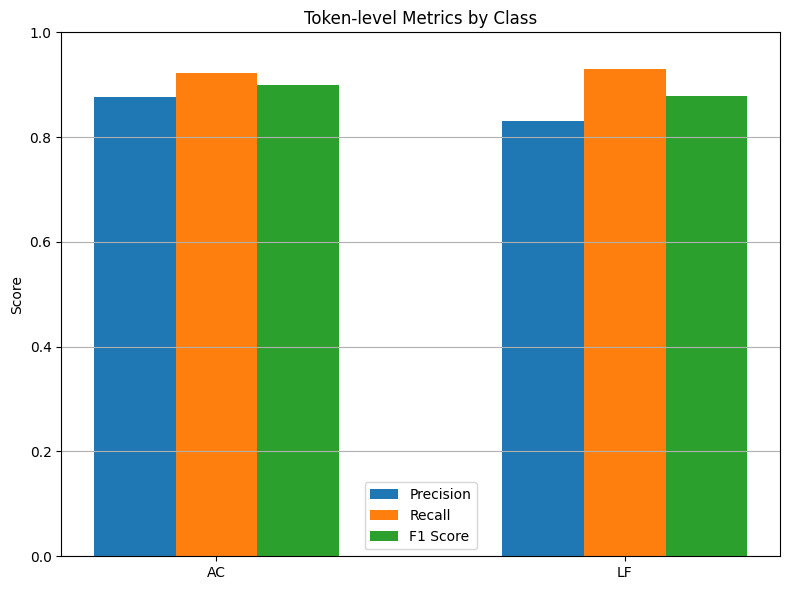

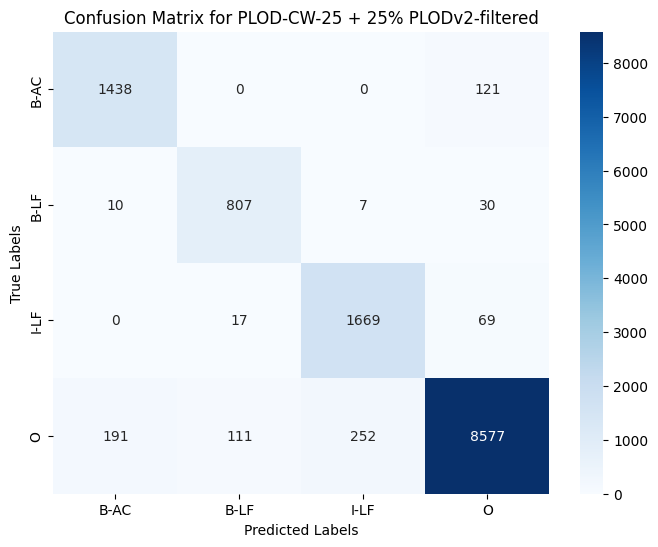

In [ ]:
%run Experiment3_Additional25.ipynb

In [ ]:
!rm -rf roberta-base

Below is experiment with RoBERTa base with adafactor optimizer and with 50% of additional data:

Map:   0%|          | 0/56075 [00:00<?, ? examples/s]

Map:   0%|          | 0/12220 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

Map:   0%|          | 0/56075 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

Map:   0%|          | 0/12220 [00:00<?, ? examples/s]

Some weights of RobertaForTokenClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,0.164500,0.147066,0.817197,0.914297,0.863025,0.940397
2,0.135600,0.142304,0.825385,0.922988,0.871462,0.943237
3,0.121200,0.150088,0.827347,0.935252,0.877996,0.944153


{'AC': {'precision': np.float64(0.8824235152969406), 'recall': np.float64(0.9435535599743425), 'f1': np.float64(0.911965282083075), 'number': np.int64(1559)}, 'LF': {'precision': np.float64(0.8550873586844809), 'recall': np.float64(0.9742388758782201), 'f1': np.float64(0.9107827038861521), 'number': np.int64(854)}, 'overall_precision': np.float64(0.8723484848484848), 'overall_recall': np.float64(0.9544135930377123), 'overall_f1': np.float64(0.9115377003760143), 'overall_accuracy': 0.945935784645462}


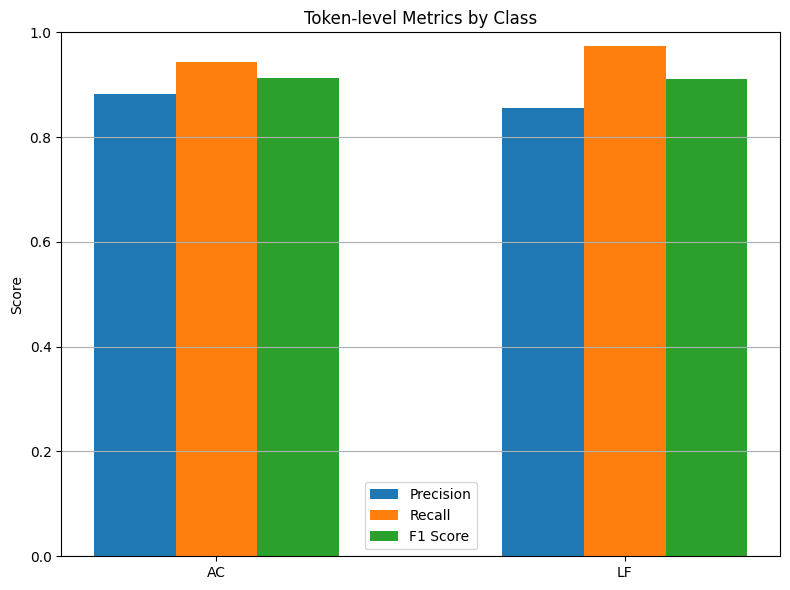

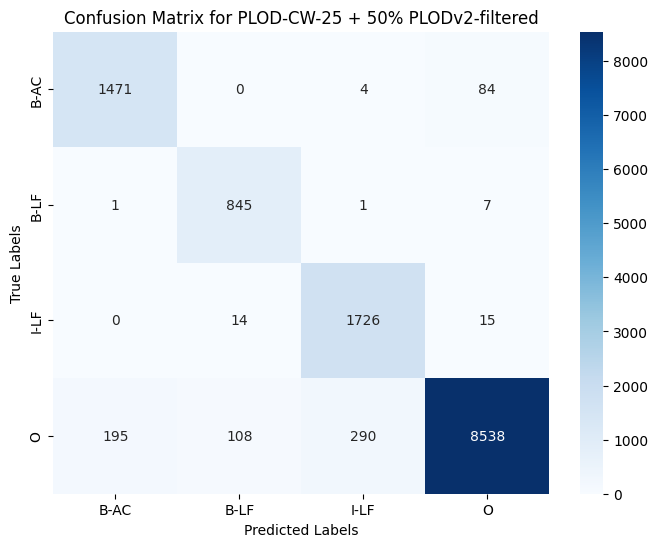

In [ ]:
%run Experiment3_Additional50.ipynb